In [1]:
# Importing Necessary Libraries and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("train.csv", encoding="utf-8")
data_test = pd.read_csv('test.csv')

print("Train subset column : {}".format(data.columns))
print("Test subset column : {}".format(data_test.columns))

Train subset column : Index(['id', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday', 'Weekly_Sales'],
      dtype='object')
Test subset column : Index(['id', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday'],
      dtype='object')


# Check all stores sales graph

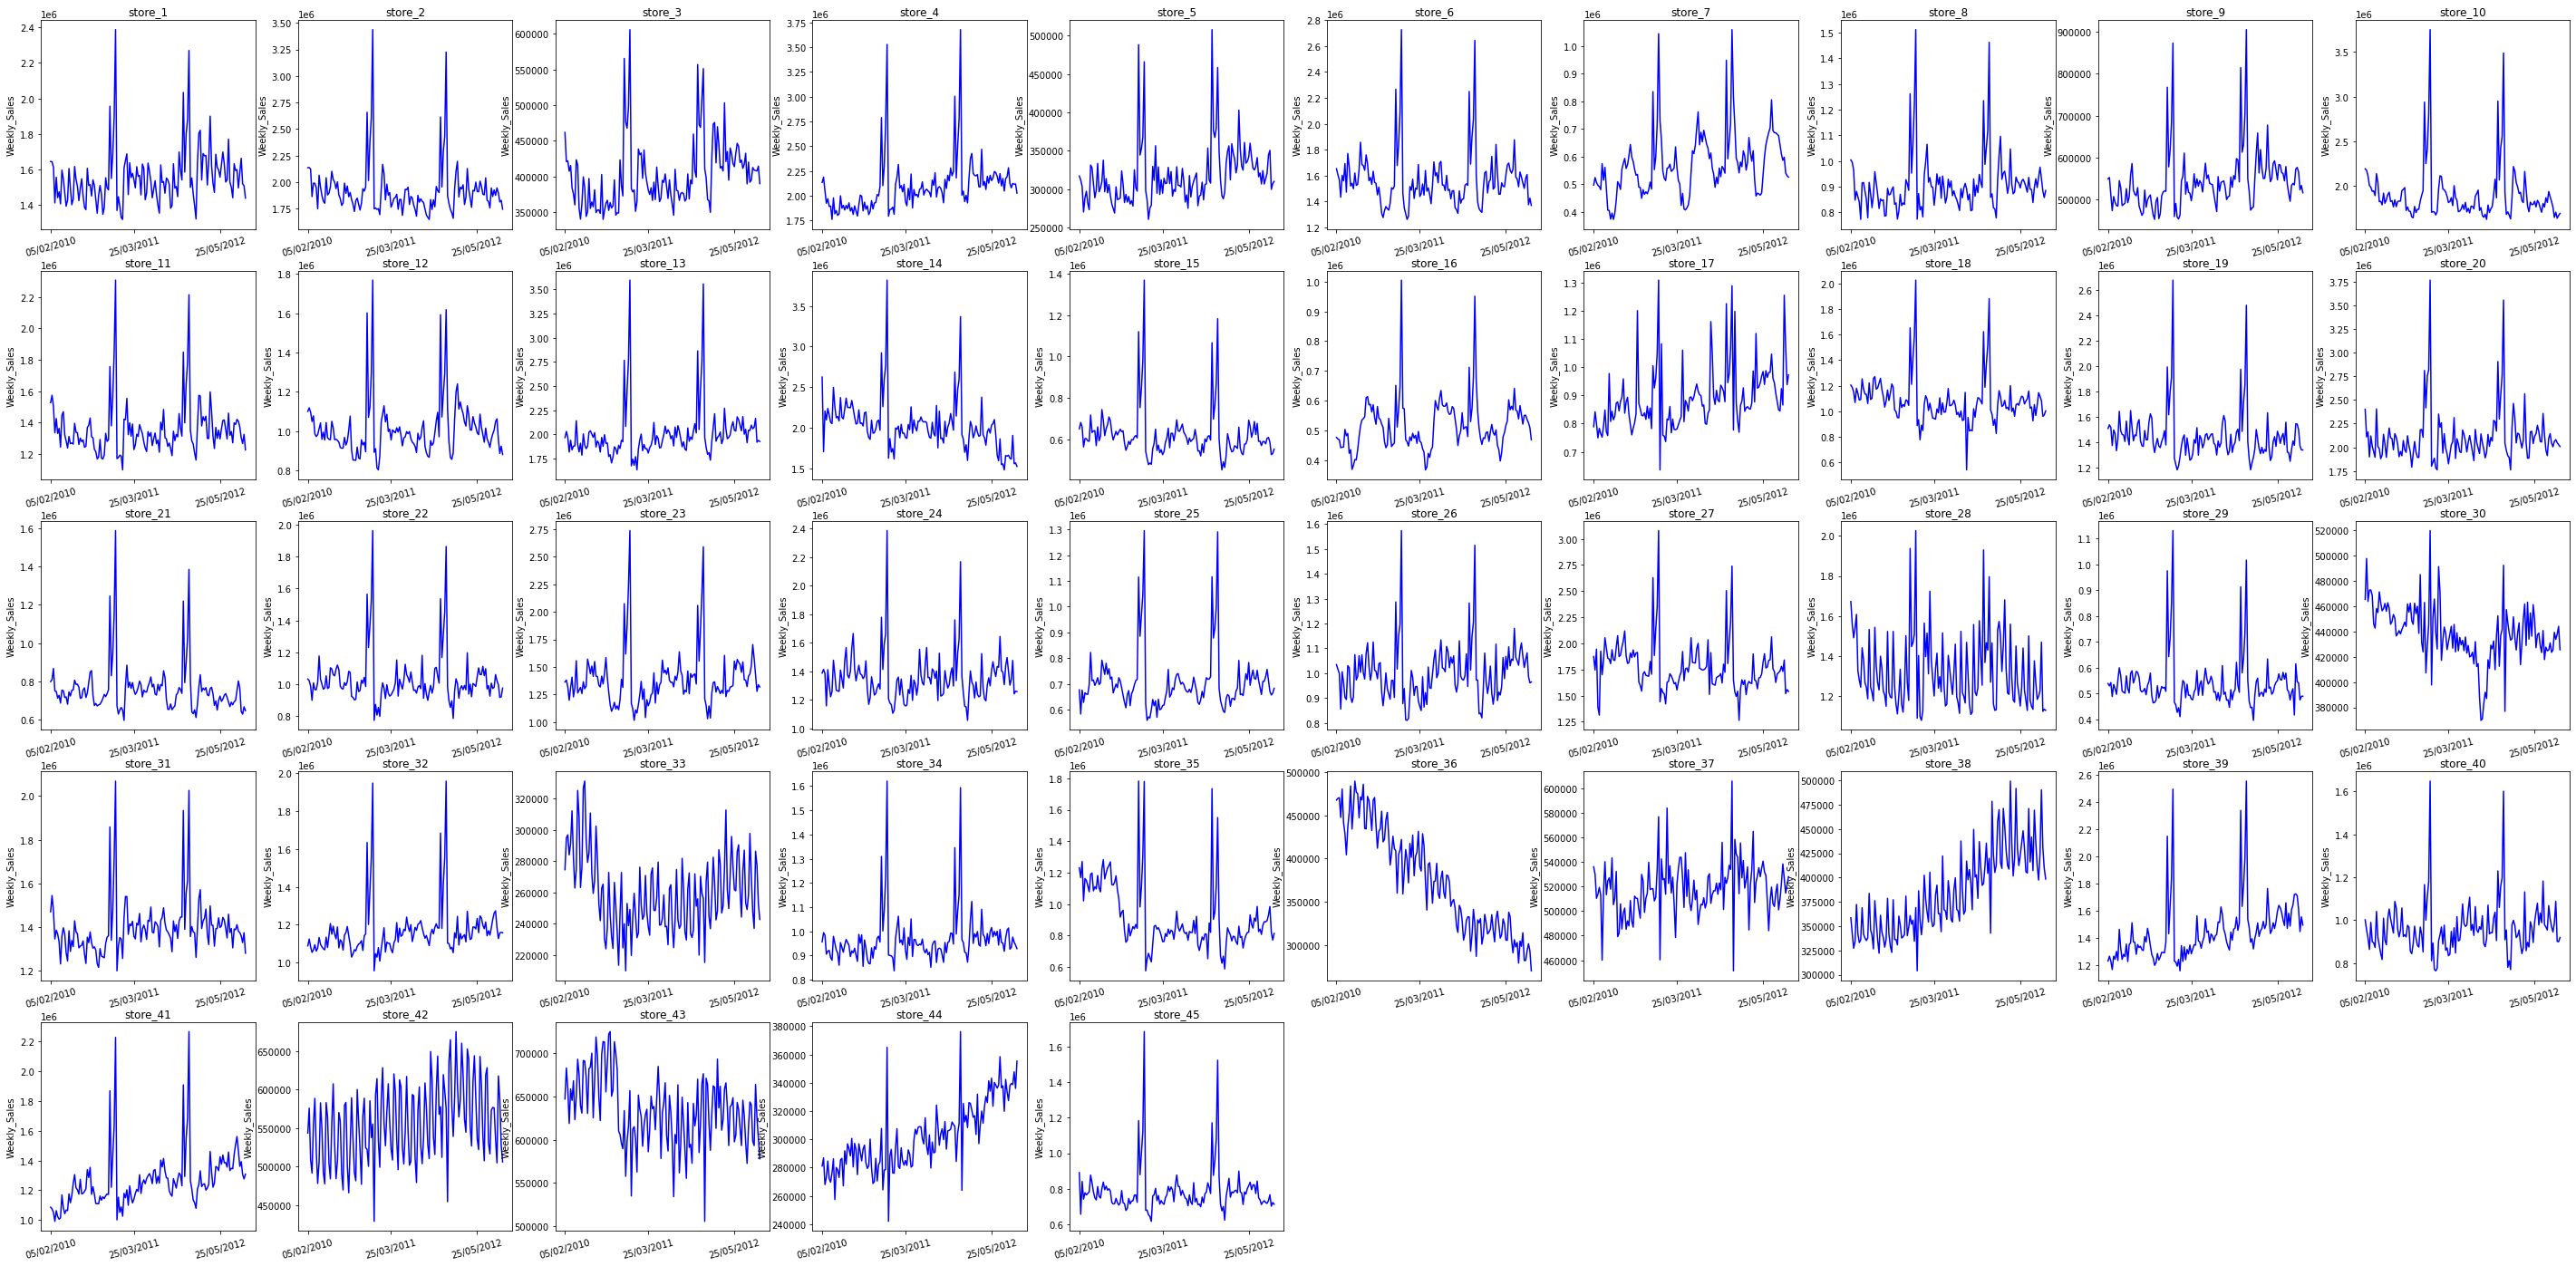

In [2]:
from matplotlib import dates

fig = plt.figure(figsize=(50,50)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정

for i in range(1,46):
    train2 = data[data.Store == i]

    train2  = train2[["Date", "Weekly_Sales"]]
    
    ax = fig.add_subplot(10,10,i) ## 그림 뼈대(프레임) 생성


    plt.title("store_{}".format(i)) 
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation=15)
    ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
    ax.plot(train2["Date"], train2["Weekly_Sales"],marker='',label='train', color="blue")

plt.show()
#%%

The graphs between specific stores were identified to be similar, and later, I will cluster them by TimeSeires KMeans.

# Check Negative Value

In [3]:
print("Train Negative Value Of Pormotion")
print(sum(data['Promotion1'] < 0))
print(sum(data['Promotion2'] < 0))
print(sum(data['Promotion3'] < 0))
print(sum(data['Promotion4'] < 0))
print(sum(data['Promotion5'] < 0))

print("Test Negative Value Of Pormotion")
print(sum(data_test['Promotion1'] < 0))
print(sum(data_test['Promotion2'] < 0))
print(sum(data_test['Promotion3'] < 0))
print(sum(data_test['Promotion4'] < 0))
print(sum(data_test['Promotion5'] < 0))

# There are some negative values on the dataset So I switch these values to 0
data['Promotion1'][data['Promotion1'] < 0] = 0
data['Promotion2'][data['Promotion2'] < 0] = 0
data['Promotion3'][data['Promotion3'] < 0] = 0
data['Promotion4'][data['Promotion4'] < 0] = 0
data['Promotion5'][data['Promotion5'] < 0] = 0

data_test['Promotion1'][data_test['Promotion1'] < 0] = 0
data_test['Promotion2'][data_test['Promotion2'] < 0] = 0
data_test['Promotion3'][data_test['Promotion3'] < 0] = 0
data_test['Promotion4'][data_test['Promotion4'] < 0] = 0
data_test['Promotion5'][data_test['Promotion5'] < 0] = 0

Train Negative Value Of Pormotion
0
18
4
0
0
Test Negative Value Of Pormotion
0
1
0
0
0


There are some negative values. It doesnt make sense that promotion value is negative. So I will switch these into 0.

# Check Missing Value

In [4]:
print("Train subset Missing value : \n")
print(data.isna().sum())

print("Test subset Missing value : \n")
print(data_test.isna().sum())

Train subset Missing value : 

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64
Test subset Missing value : 

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64


There are some negative values. I think the promotions were not done at this time. So I will switch these into 0 on both subset.

# Fill 0 on Missing and Negative Value

In [5]:
# There are some negative values on the dataset So I switch these values to 0
data['Promotion1'][data['Promotion1'] < 0] = 0
data['Promotion2'][data['Promotion2'] < 0] = 0
data['Promotion3'][data['Promotion3'] < 0] = 0
data['Promotion4'][data['Promotion4'] < 0] = 0
data['Promotion5'][data['Promotion5'] < 0] = 0

data_test['Promotion1'][data_test['Promotion1'] < 0] = 0
data_test['Promotion2'][data_test['Promotion2'] < 0] = 0
data_test['Promotion3'][data_test['Promotion3'] < 0] = 0
data_test['Promotion4'][data_test['Promotion4'] < 0] = 0
data_test['Promotion5'][data_test['Promotion5'] < 0] = 0

# Fill 0 on missing value
data.fillna(0, inplace=True)
data_test.fillna(0, inplace = True)


# Change date format

In [6]:
# Date format is not comportable to me. So i change the format : day/month/year -> year-month-day
date_df = data.loc[:, ['Date']]


for i in range(len(date_df)) :
    date_list =  date_df.loc[i].str.split('/')
    date_df.loc[i] = date_list[0][2] + '-' + date_list[0][1] + '-' + date_list[0][0]

data['Date'] = date_df

# Change type of 'Date' : object to datedime
data['Date'] = pd.to_datetime(data["Date"])
data['week'] =data['Date'].dt.week
data['month'] =data['Date'].dt.month 
data['year'] =data['Date'].dt.year
data['WeekOfYear'] = (data.Date.dt.isocalendar().week)*1.0 
data['day'] = data['Date'].dt.day

# Analyze the sales volume of a specific store by year

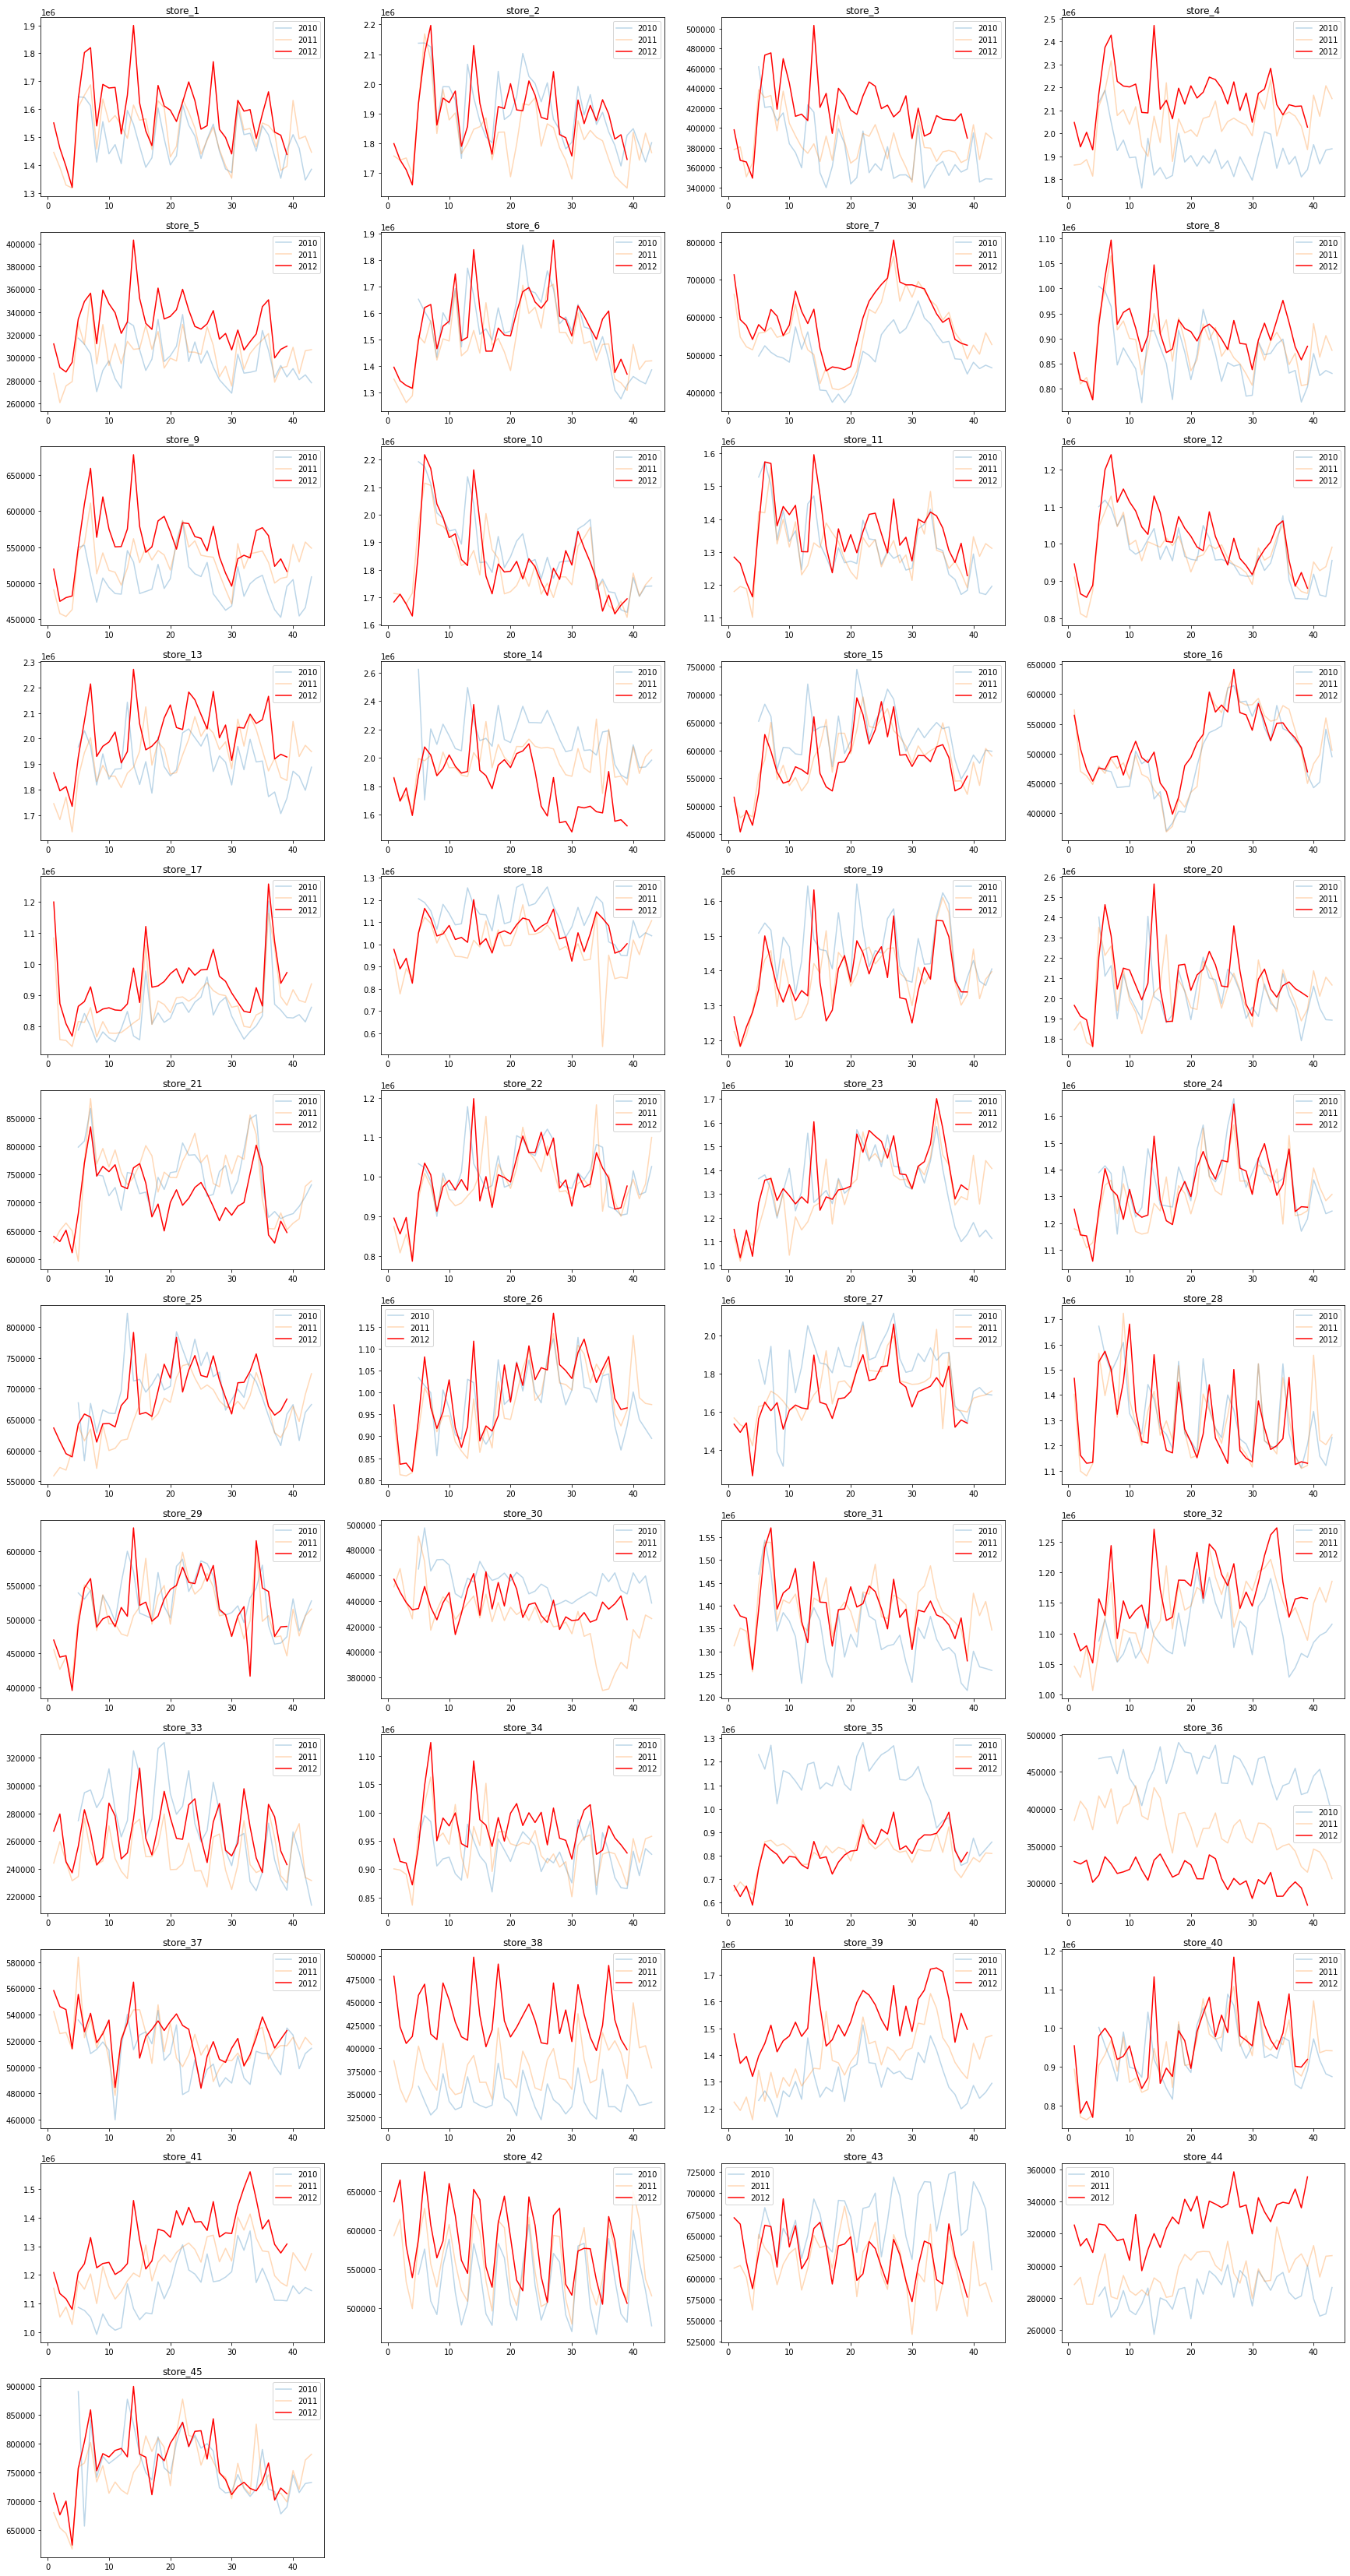

In [7]:
fig = plt.figure(figsize=(30,60))
train_df = data
for store in range(1,46):
    storeset = train_df[train_df.Store==store]
    storeset_2010 = storeset[(storeset.year==2010) & (storeset.WeekOfYear<=43)]
    storeset_2011 = storeset[(storeset.year==2011) & (storeset.WeekOfYear<=43)]
    storeset_2012 = storeset[(storeset.year==2012) & (storeset.WeekOfYear<=43)]
    
    #test_pred_store = test_df[test_df.Store==store]
    
    # 그래프의 연속성을 위해 예측한 데이터의 전 주의 데이터도 넣어준다.
    #test_pred_store = pd.concat([storeset_2012.iloc[-1:], test_pred_store])
    
    ax = fig.add_subplot(12, 4, store)
    
    plt.title(f"store_{store}")
    ax.plot(storeset_2010.WeekOfYear, storeset_2010.Weekly_Sales, label="2010", alpha=0.3)
    ax.plot(storeset_2011.WeekOfYear, storeset_2011.Weekly_Sales, label="2011", alpha=0.3)
    ax.plot(storeset_2012.WeekOfYear, storeset_2012.Weekly_Sales, label="2012", color='r')
    #ax.plot(test_pred_store.WeekOfYear, test_pred_store.Before_Weekly_Sales, label="2012-pred", color='b')
    ax.legend()
    
plt.show()

It can be seen that the sales graph in 2012 is generally very similar to 2010 or 2011.

# Cluster Time Series Data

In [8]:

from tslearn.clustering import TimeSeriesKMeans

scaled_time_series_df = pd.DataFrame()
for num in range(1, 46) :
    col_name = "Store " +str(num)
    scaler = MinMaxScaler()
    time_series = data[(data.Store==num) & (data.month <= 10)]['Weekly_Sales'].values.reshape(-1, 1)
    scaled_time_series = scaler.fit_transform(time_series) 
    scaled_time_series = pd.DataFrame(scaled_time_series)
    scaled_time_series_df[col_name] = scaled_time_series

transpose_scaled_time_series_df = scaled_time_series_df.transpose()
    
km = TimeSeriesKMeans(n_clusters=2, 
                      metric="dtw", 
                      max_iter=5,
                      random_state=2022)

prediction = km.fit_predict(transpose_scaled_time_series_df)

list_0 = []
list_1 = []
#list_2 = []

for i in range(len(prediction)) :
    if prediction[i] == 0 :
        list_0.append(i+1)
    elif prediction[i] == 1 :
        list_1.append(i+1)
    #else:
        #list_2.append(i+1)

print("Clustering 0 : ", list_0)
print("Clustering 1 : ", list_1)
#print("Clustering 2 : ", list_2)

for i in range(len(prediction)) :
    if prediction[i] == 0 :
        data.loc[(data.Store== i + 1), 'Type'] = 0
    elif prediction[i] == 1 :
        data.loc[(data.Store== i + 1), 'Type'] = 1
    #else:
        #data.loc[(data.Store== i + 1), 'Type'] = 2
#%%

Clustering 0 :  [2, 6, 10, 11, 14, 15, 18, 19, 21, 22, 27, 28, 29, 30, 33, 35, 36, 43, 45]
Clustering 1 :  [1, 3, 4, 5, 7, 8, 9, 12, 13, 16, 17, 20, 23, 24, 25, 26, 31, 32, 34, 37, 38, 39, 40, 41, 42, 44]


The performance was better when clustered into two than when clustered into three.

# To distinguish holidays

In [9]:
#%%
data.loc[(data['Date'] == '2010-02-12')|(data['Date'] == '2011-02-11')|(data['Date'] == '2012-02-10'),'Super_Bowl'] = True
data.loc[(data['Date'] != '2010-02-12')&(data['Date'] != '2011-02-11')&(data['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates in train set
data.loc[(data['Date'] == '2010-09-10')|(data['Date'] == '2011-09-09')|(data['Date'] == '2012-09-07'),'Labor_Day'] = True
data.loc[(data['Date'] != '2010-09-10')&(data['Date'] != '2011-09-09')&(data['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates in train set
data.loc[(data['Date'] == '2010-11-26')|(data['Date'] == '2011-11-25'),'Thanksgiving'] = True
data.loc[(data['Date'] != '2010-11-26')&(data['Date'] != '2011-11-25'),'Thanksgiving'] = False

#Christmas dates in train set
data.loc[(data['Date'] == '2010-12-31')|(data['Date'] == '2011-12-30'),'Christmas'] = True
data.loc[(data['Date'] != '2010-12-31')&(data['Date'] != '2011-12-30'),'Christmas'] = False

data['Super_Bowl'] = data['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
data['Thanksgiving'] = data['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
data['Labor_Day'] = data['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
data['Christmas'] = data['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
data['IsHoliday'] = data['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1
#%%

data_test.loc[(data_test['Date'] == '2010-02-12')|(data_test['Date'] == '2011-02-11')|(data_test['Date'] == '2012-02-10'),'Super_Bowl'] = True
data_test.loc[(data_test['Date'] != '2010-02-12')&(data_test['Date'] != '2011-02-11')&(data_test['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates in train set
data_test.loc[(data_test['Date'] == '2010-09-10')|(data_test['Date'] == '2011-09-09')|(data_test['Date'] == '2012-09-07'),'Labor_Day'] = True
data_test.loc[(data_test['Date'] != '2010-09-10')&(data_test['Date'] != '2011-09-09')&(data_test['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates in train set
data_test.loc[(data_test['Date'] == '2010-11-26')|(data_test['Date'] == '2011-11-25'),'Thanksgiving'] = True
data_test.loc[(data_test['Date'] != '2010-11-26')&(data_test['Date'] != '2011-11-25'),'Thanksgiving'] = False

#Christmas dates in train set
data_test.loc[(data_test['Date'] == '2010-12-31')|(data_test['Date'] == '2011-12-30'),'Christmas'] = True
data_test.loc[(data_test['Date'] != '2010-12-31')&(data_test['Date'] != '2011-12-30'),'Christmas'] = False

data_test['Super_Bowl'] = data_test['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
data_test['Thanksgiving'] = data_test['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
data_test['Labor_Day'] = data_test['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
data_test['Christmas'] = data_test['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
data_test['IsHoliday'] = data_test['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1


<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

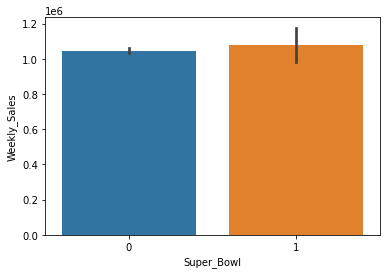

In [10]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data) # Super bowl holiday vs not-super bowl on train subset

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

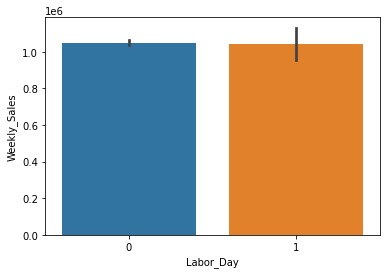

In [11]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=data) # Labor day holiday vs not-labor day on train set

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

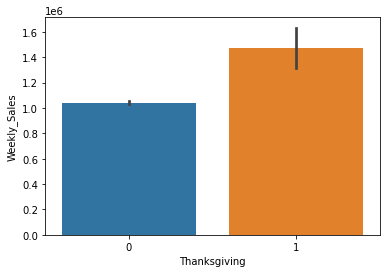

In [12]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data) # Thanksgiving holiday vs not-thanksgiving on train set

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

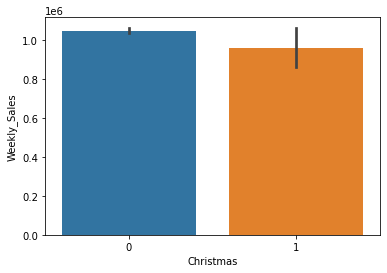

In [13]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=data) # Christmas holiday vs not-Christmas

<AxesSubplot:xlabel='Super_Bowl', ylabel='count'>

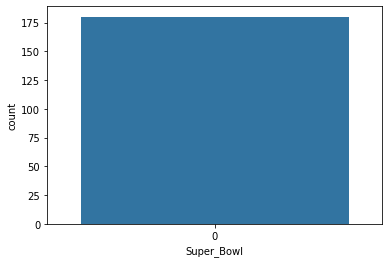

In [14]:
sns.countplot(x='Super_Bowl', data=data_test) # Super bowl holiday vs not-super bowl on test subset

<AxesSubplot:xlabel='Labor_Day', ylabel='count'>

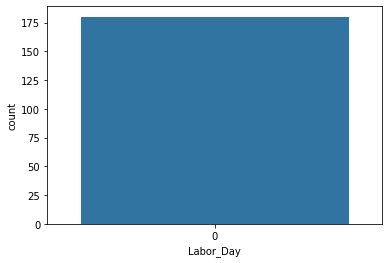

In [15]:
sns.countplot(x='Labor_Day', data=data_test) # Labor day holiday vs not-labor day on test set

<AxesSubplot:xlabel='Thanksgiving', ylabel='count'>

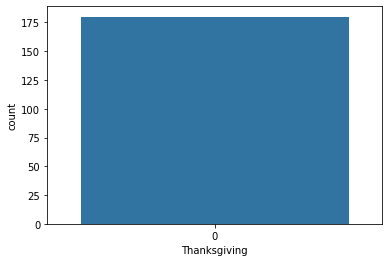

In [16]:
sns.countplot(x='Thanksgiving', data=data_test) # Thanksgiving holiday vs not-thanksgiving on test set

<AxesSubplot:xlabel='Christmas', ylabel='count'>

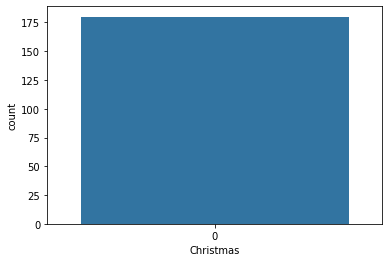

In [17]:
sns.countplot(x='Christmas', data=data_test) # Christmas holiday vs not-Christmas on test set

You can see that there is a big difference in sales on certain holidays

# Correlation

### Correlation between point-to-point sales and variables before PROMOTION pre-processing

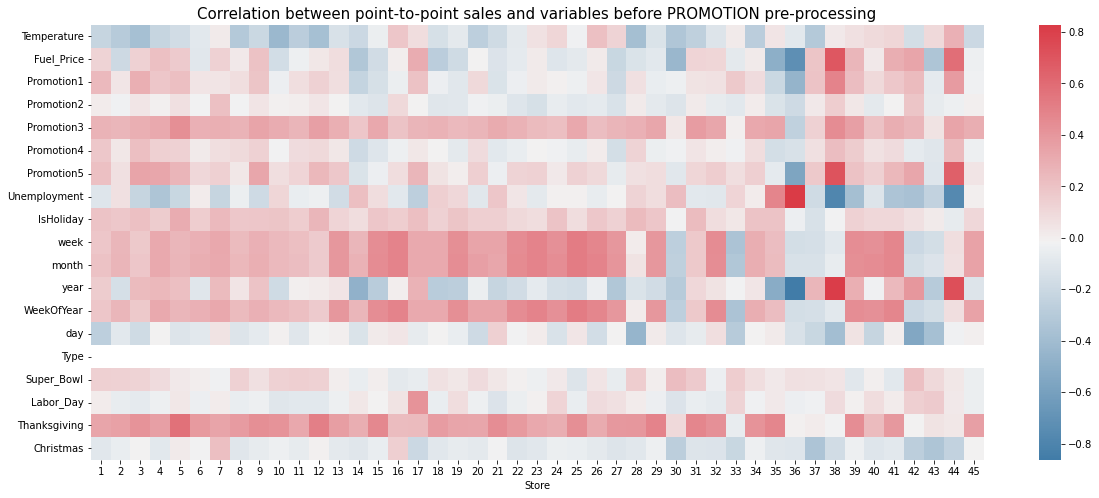

In [18]:
# Analyze Correlation by Store
corr = []
for num in range(1,46):
    co = data[data.Store==num]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['index', 'id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(20,8))
plt.title("Correlation between point-to-point sales and variables before PROMOTION pre-processing", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax)
plt.xlabel('Store')
plt.show()

There is no special insight, the Date is subdivided to see the correlation

### Correlation before 2010 October

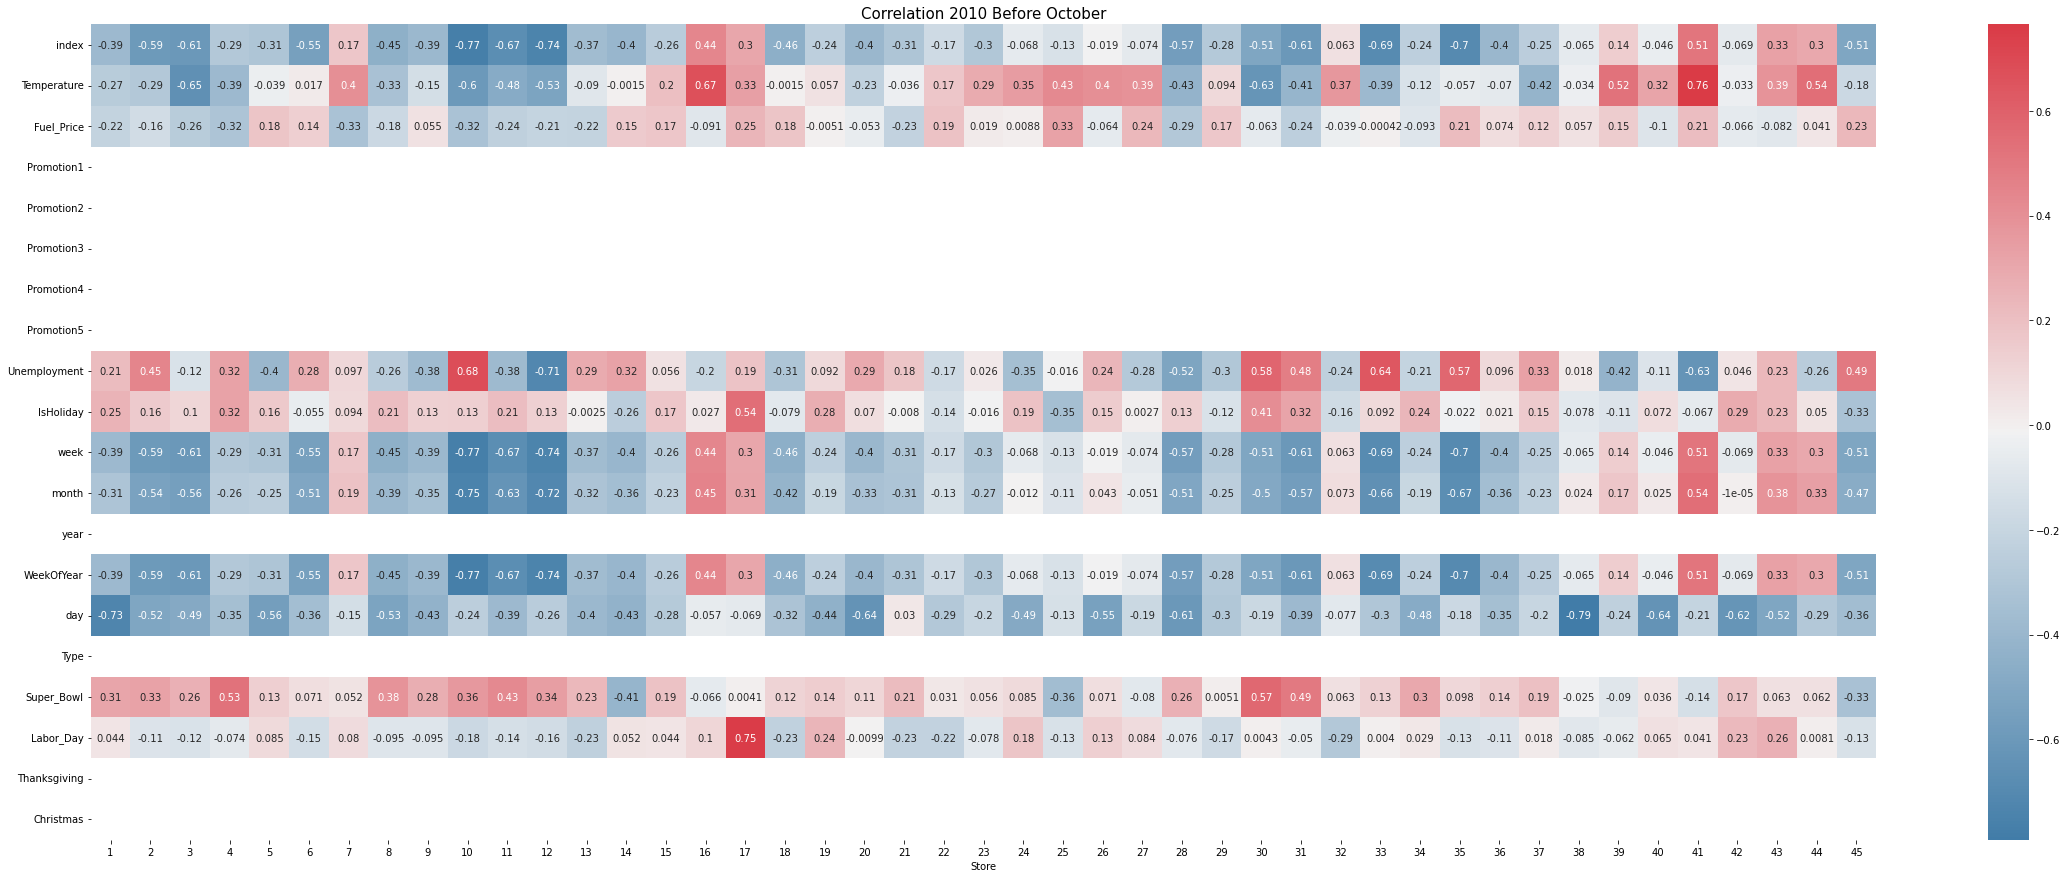

In [19]:
# Analyze Correlation by Store
corr = []
for num in range(1,46):
    co = data[(data.Store==num) & (data.year==2010) & (data.month <= 10)]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(40, 15))
plt.title("Correlation 2010 Before October", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax, annot=True)
plt.xlabel('Store')
plt.show()
#%%

### Correlation before 2011 October

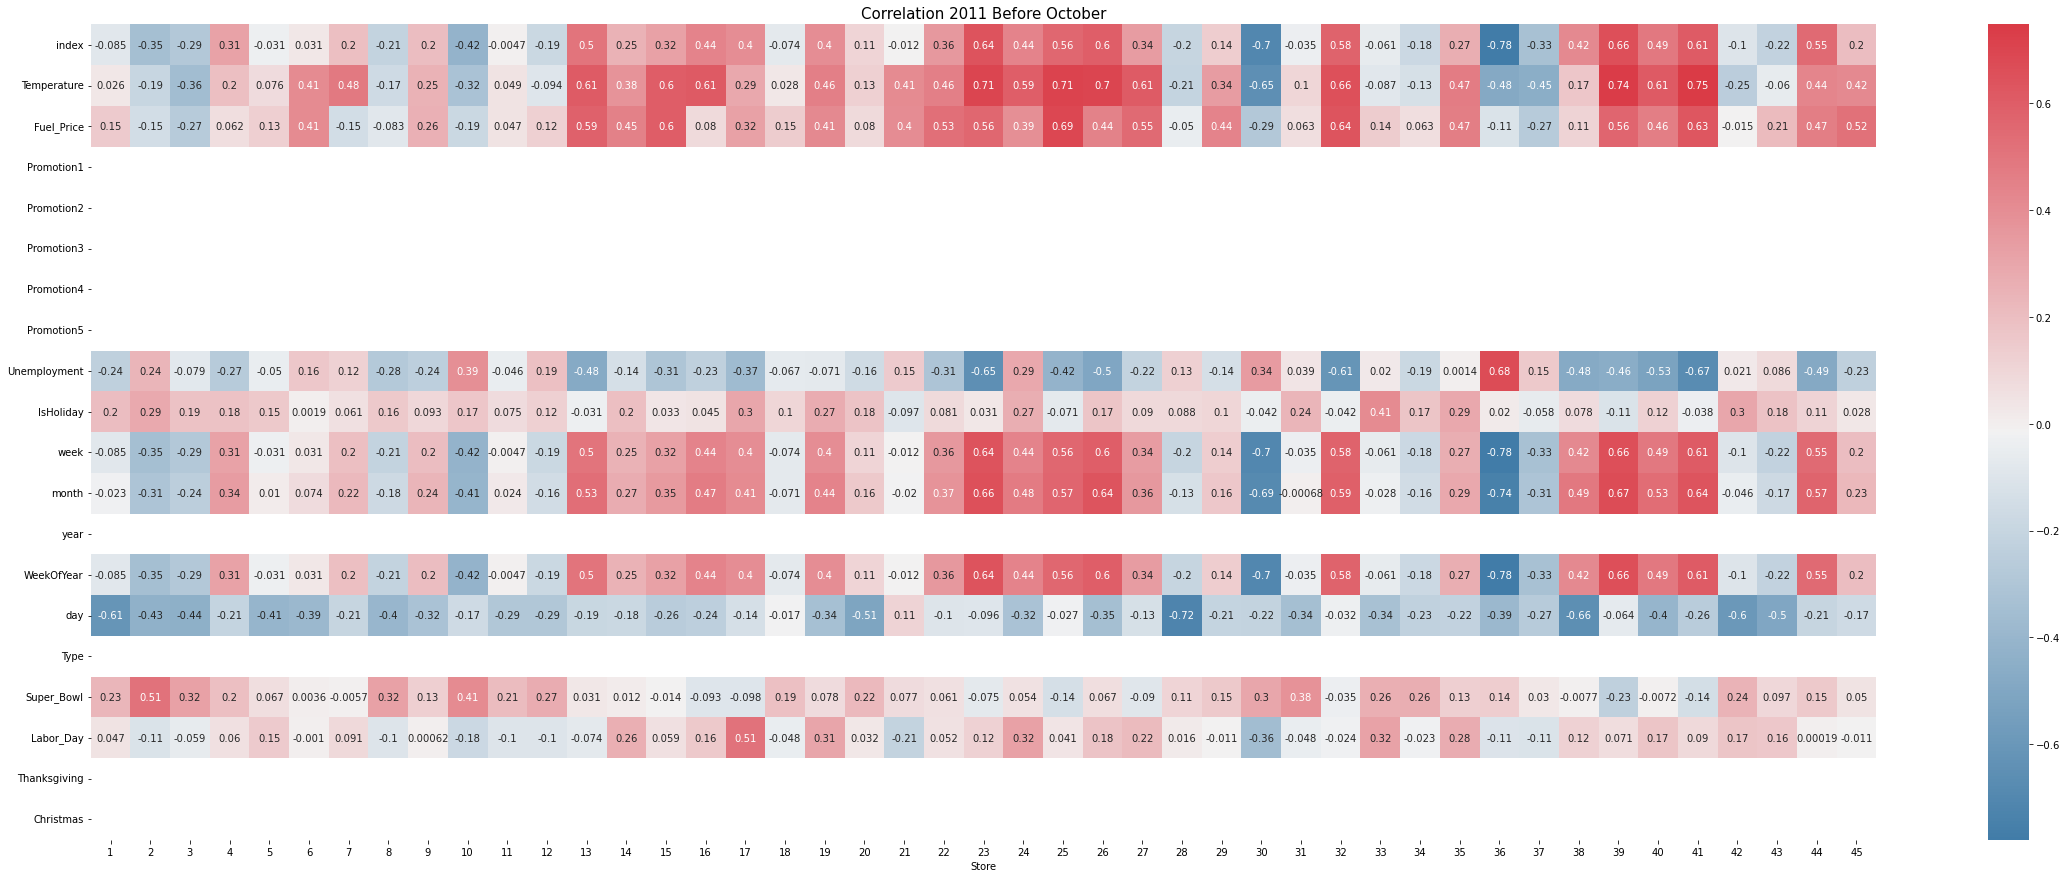

In [20]:
# Analyze Correlation by Store
corr = []
for num in range(1,46):
    co = data[(data.Store==num) & (data.year==2011) & (data.month <= 10)]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(40,15))
plt.title("Correlation 2011 Before October", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax, annot=True)
plt.xlabel('Store')
plt.show()

### Correlation all year before October

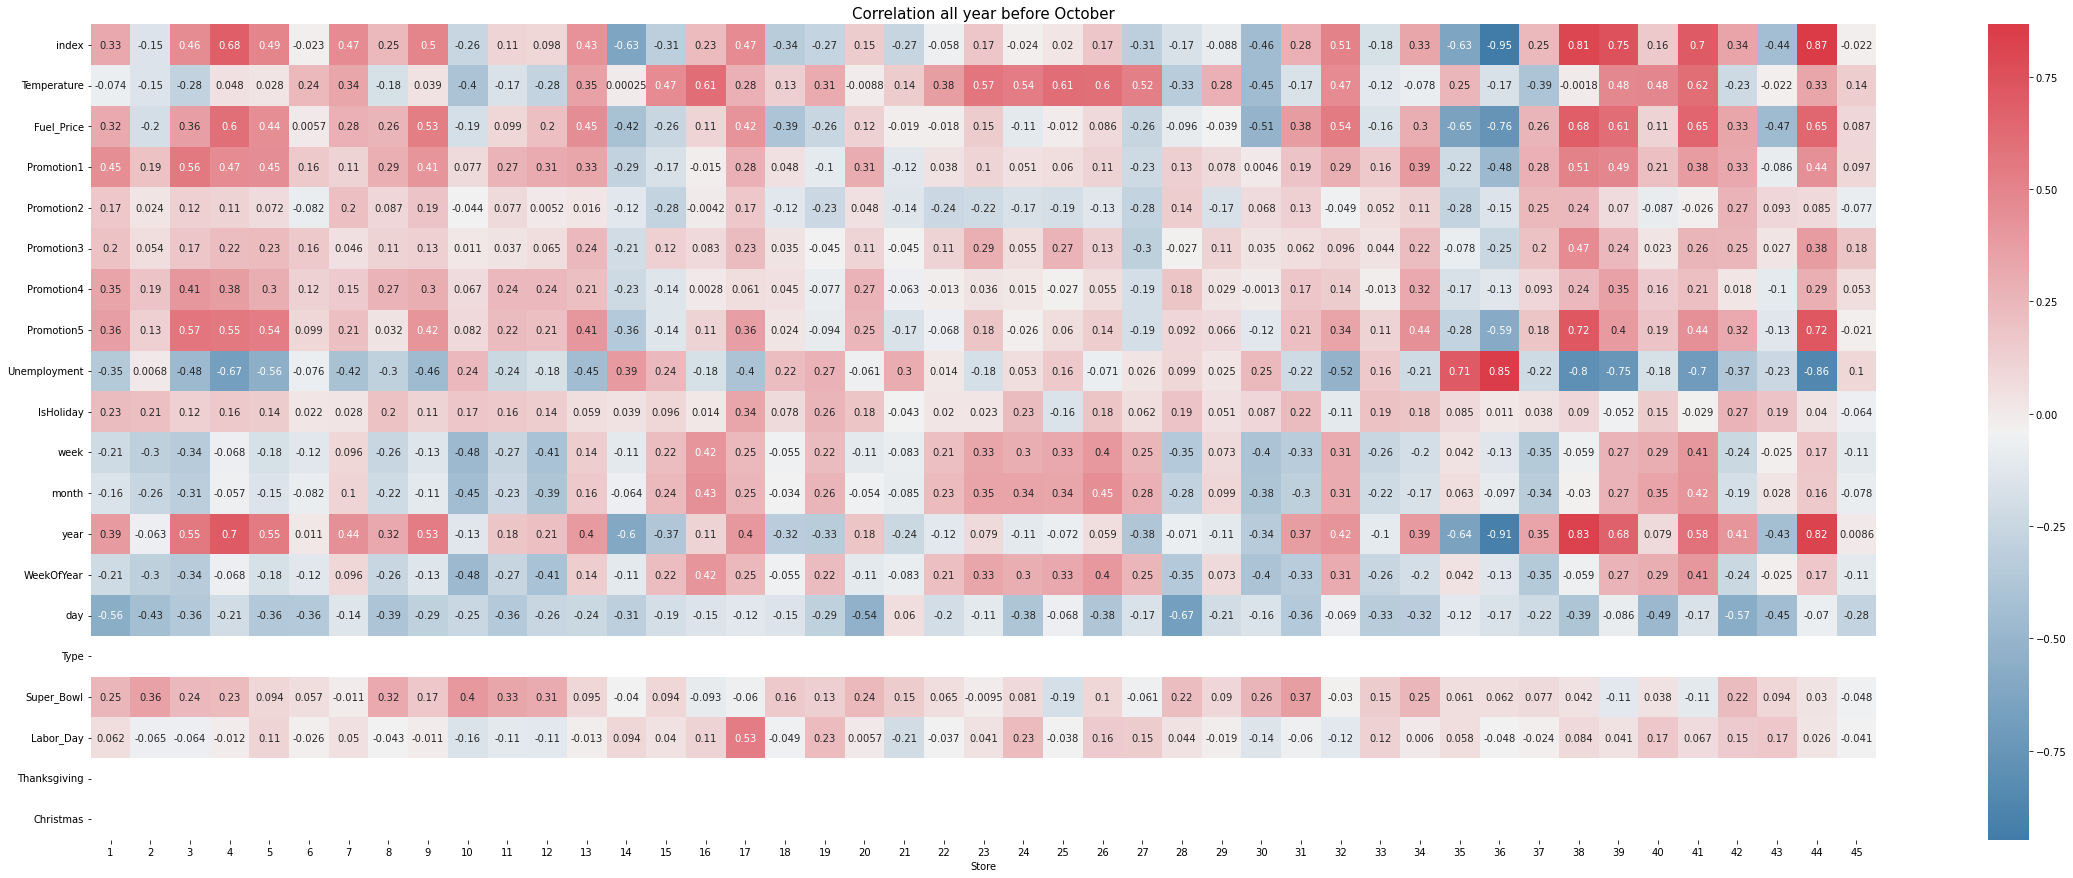

In [21]:
# Analyze Correlation by Store
corr = []
for num in range(1,46):
    co = data[(data.Store==num) & (data.month <= 10)]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(40,15))
plt.title("Correlation all year before October", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax, annot=True)
plt.xlabel('Store')
plt.show()

### Correlation only 2010 October

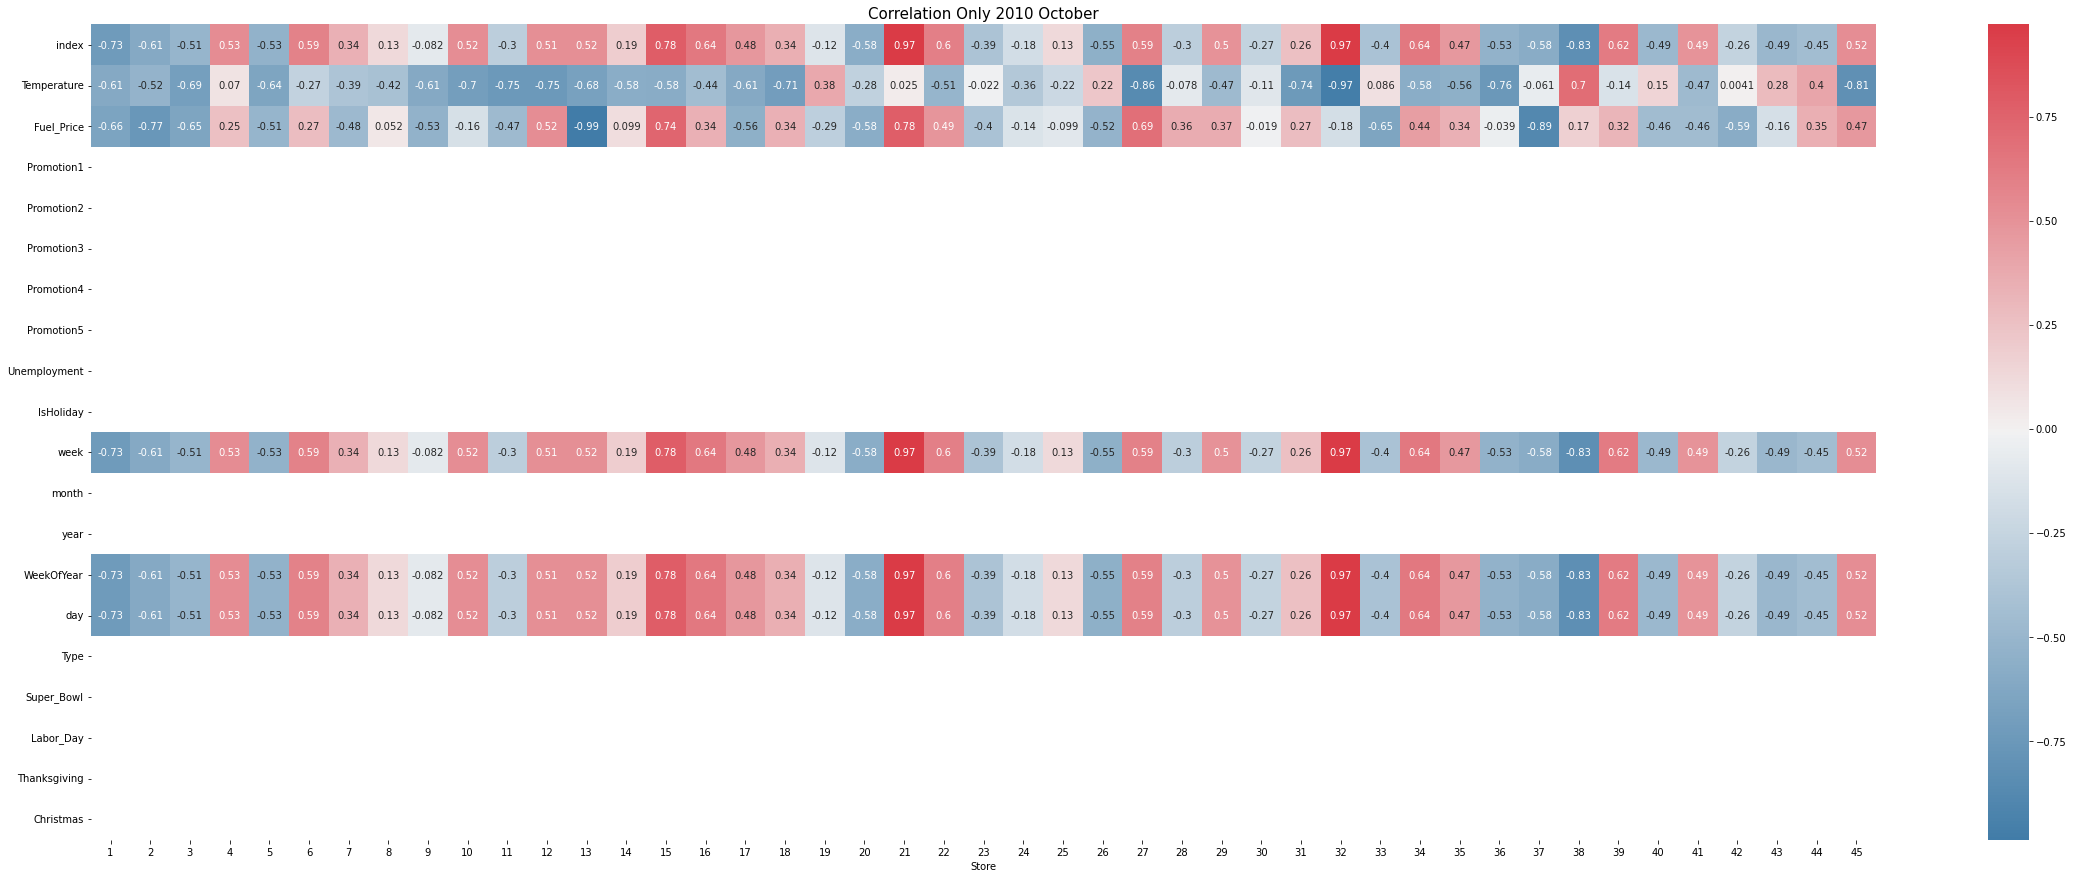

In [22]:
# Analyze Correlation by Store
corr = []
for num in range(1,46):
    co = data[(data.Store==num) & (data.year==2010) & (data.month == 10)]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(40,15))
plt.title("Correlation Only 2010 October", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax, annot=True)
plt.xlabel('Store')
plt.show()

### Correlation only 2011 October

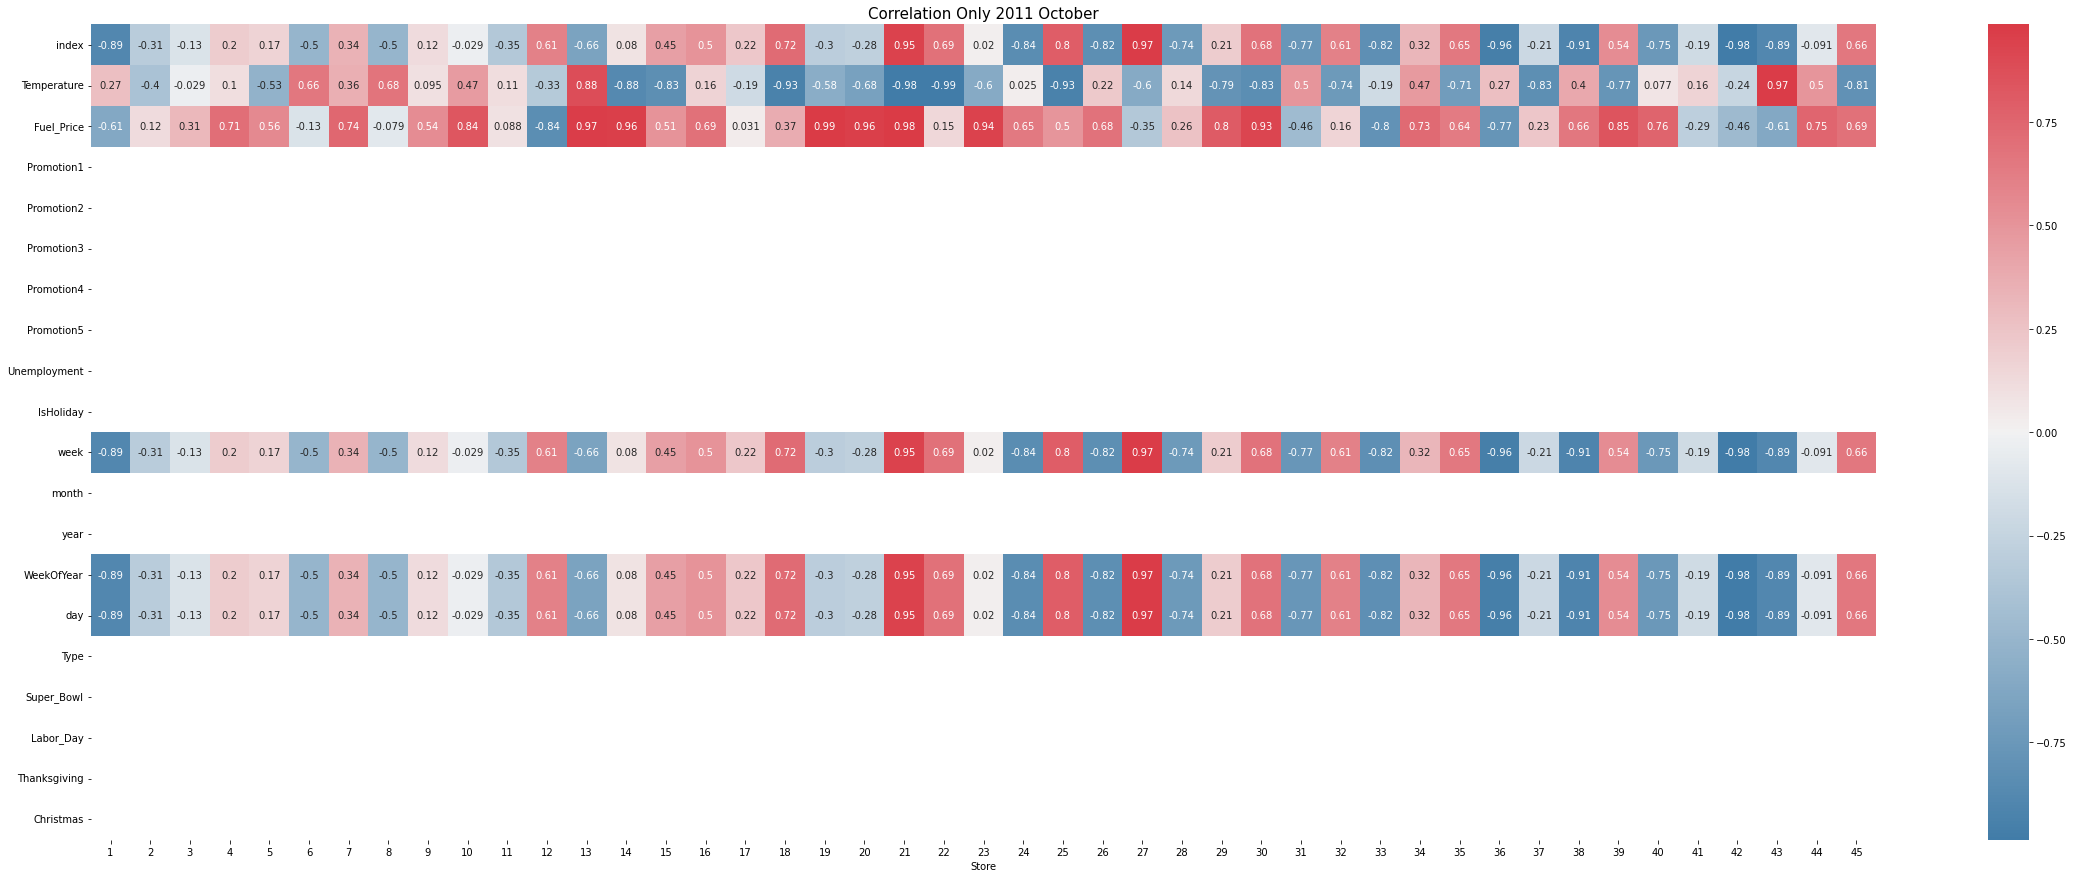

In [23]:
# Analyze Correlation by Store
corr = []
for num in range(1,46):
    co = data[(data.Store==num) & (data.year==2011) & (data.month == 10)]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(40,15))
plt.title("Correlation Only 2011 October", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax, annot=True)
plt.xlabel('Store')
plt.show()

### Correlation Only 2012

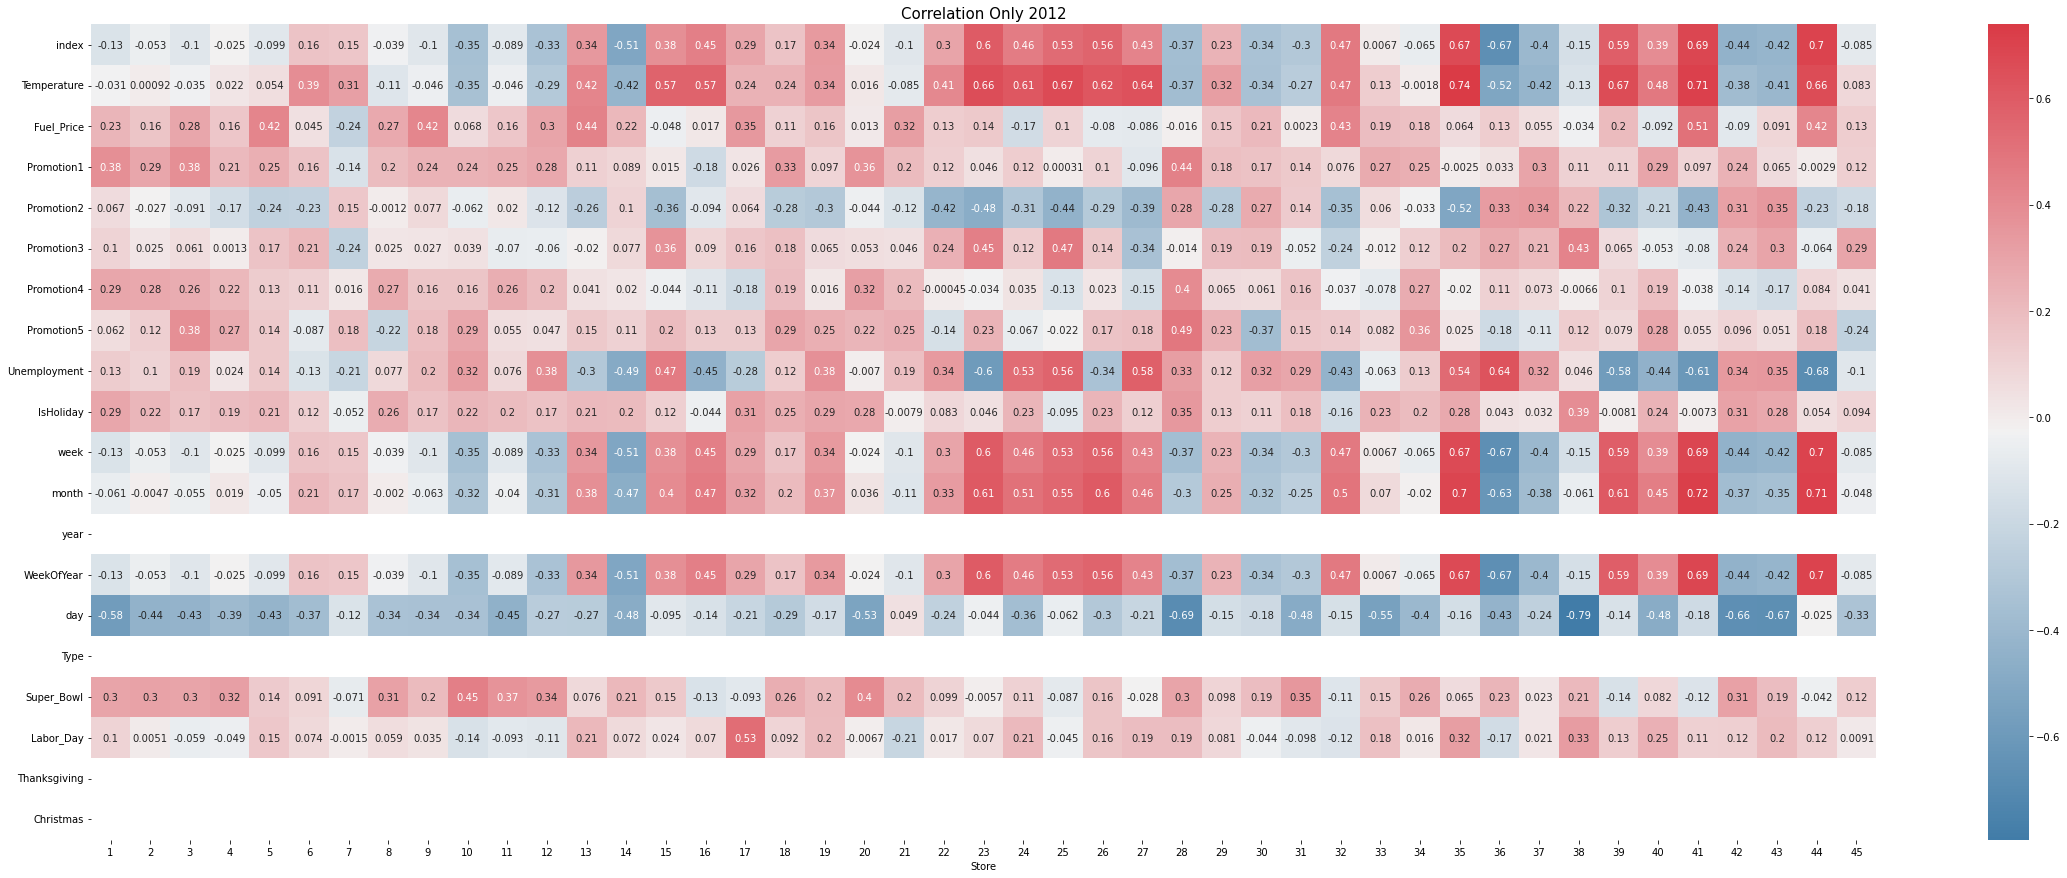

In [24]:
corr = []
for num in range(1,46):
    co = data[(data.Store==num) & (data.year==2012)]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(40,15))
plt.title("Correlation Only 2012", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax, annot=True)
plt.xlabel('Store')
plt.show()

### Correlation Only 2012 on integration by Store

Text(0.5, 1.0, 'Correlation Matrix only 2012')

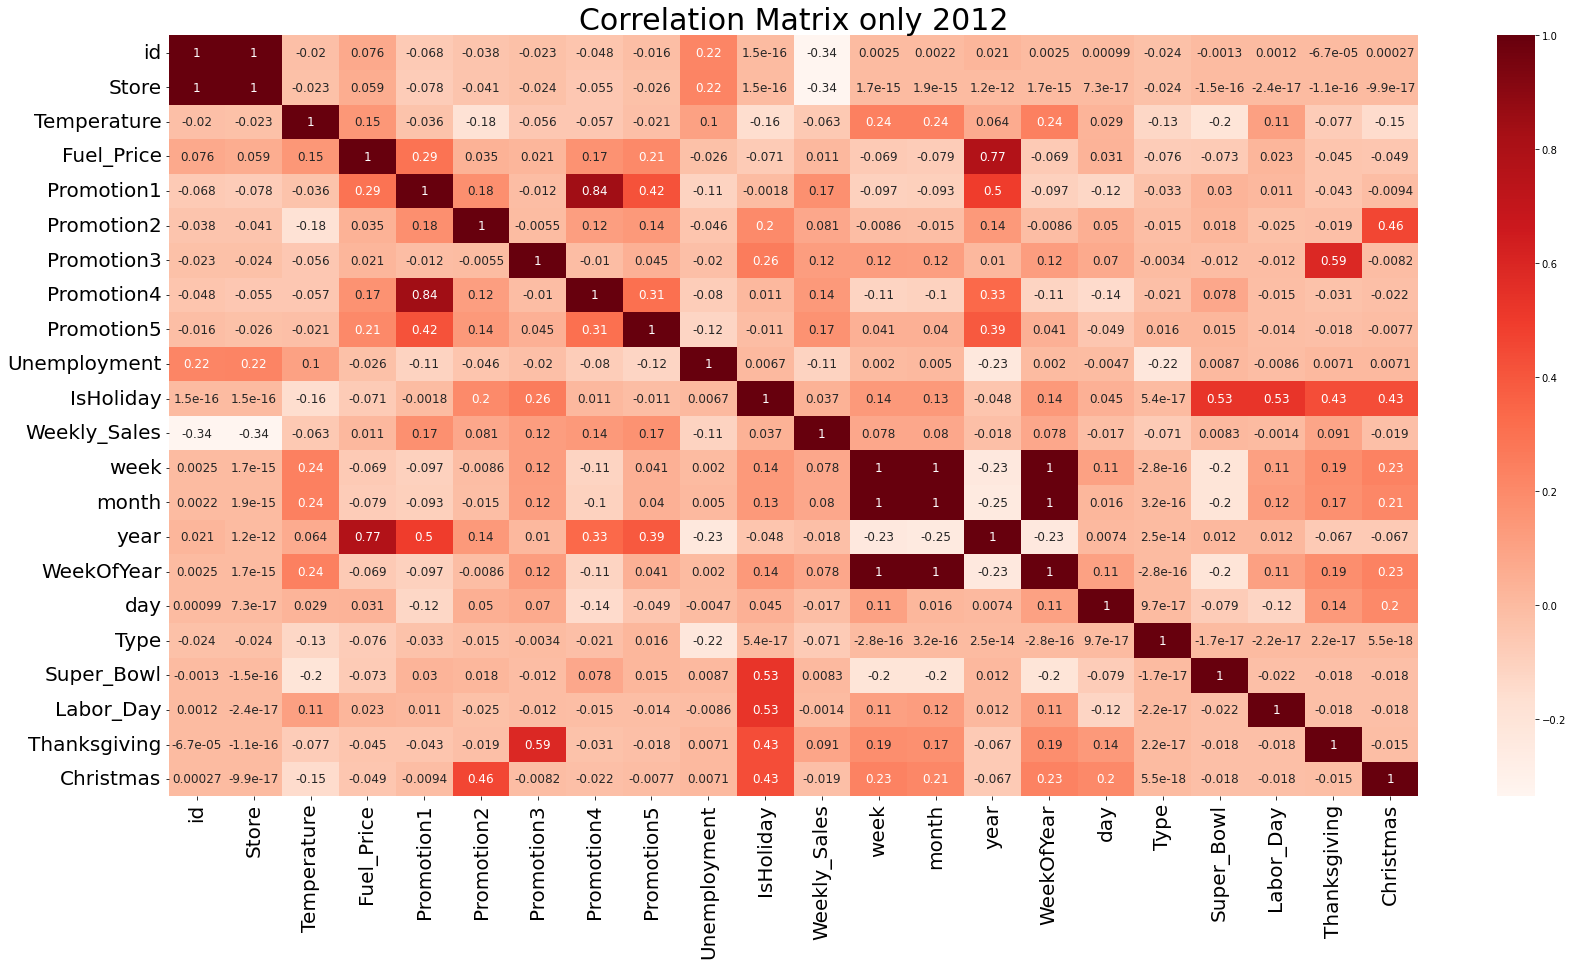

In [25]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
temp = data[data.year==2012]
sns.heatmap(data.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix only 2012', fontsize=30)

# ETC

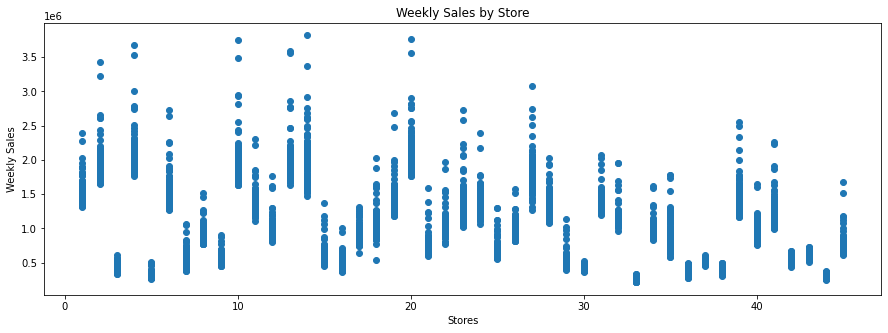

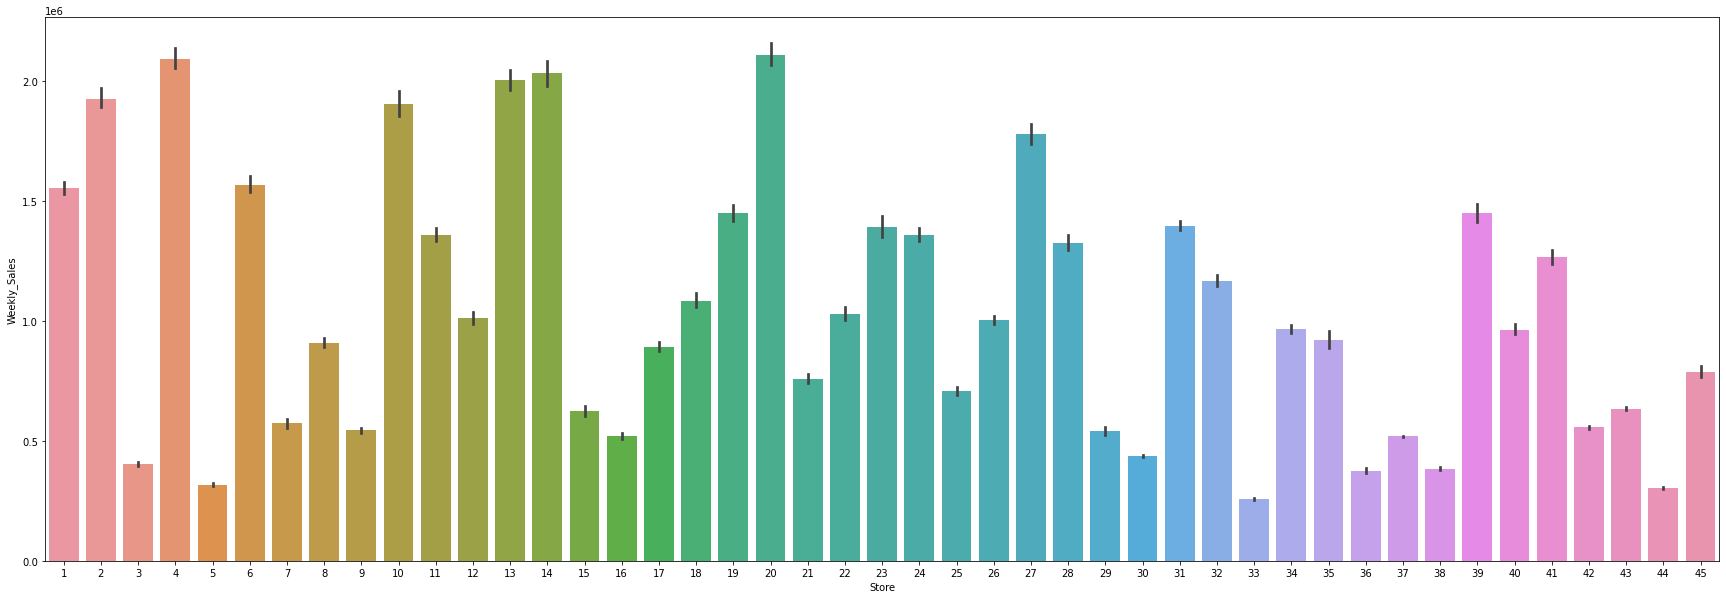

In [26]:
x = data['Store']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data)

<AxesSubplot:xlabel='Unemployment'>

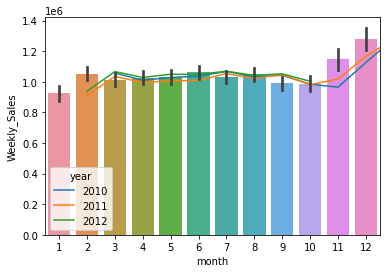

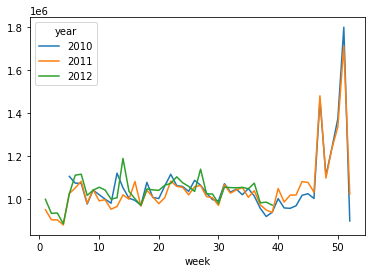

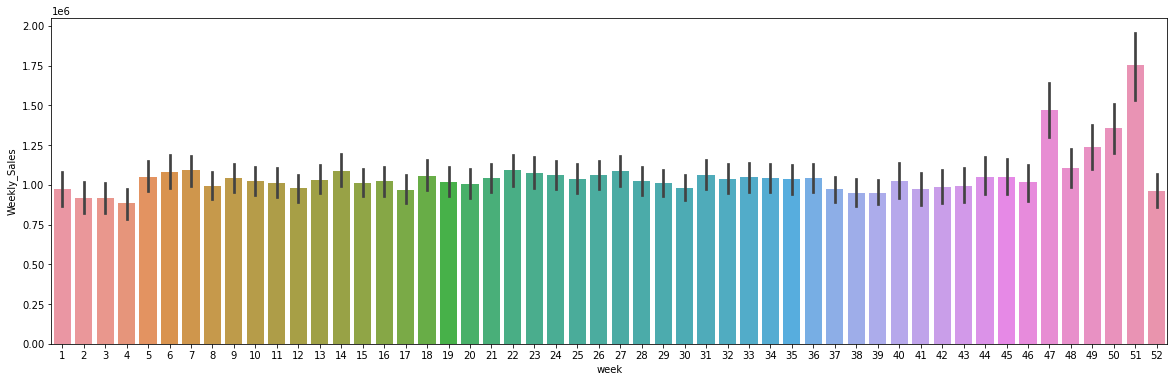

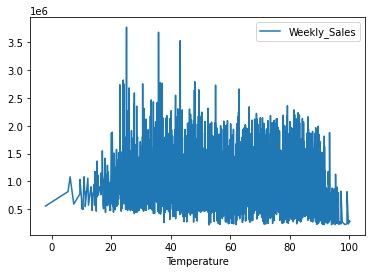

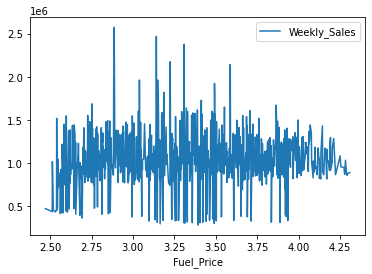

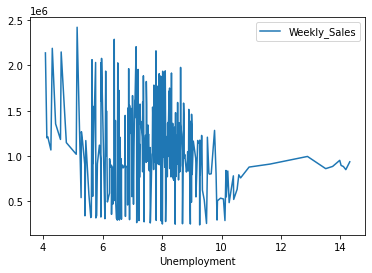

In [27]:
# Group by year
data.groupby('year')['Weekly_Sales'].mean()
# Group by month
data.groupby('month')['Weekly_Sales'].mean()
# Group by week
data.groupby('week')['Weekly_Sales'].mean()

# Visualization by month
monthly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

fig = sns.barplot(x='month', y='Weekly_Sales', data=data)


# Visualization by week
weekly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=data)

# External variable check

temperature = pd.pivot_table(data, values = 'Weekly_Sales', index= "Temperature")
temperature.plot()

fuel_price = pd.pivot_table(data, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

unemployment = pd.pivot_table(data, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

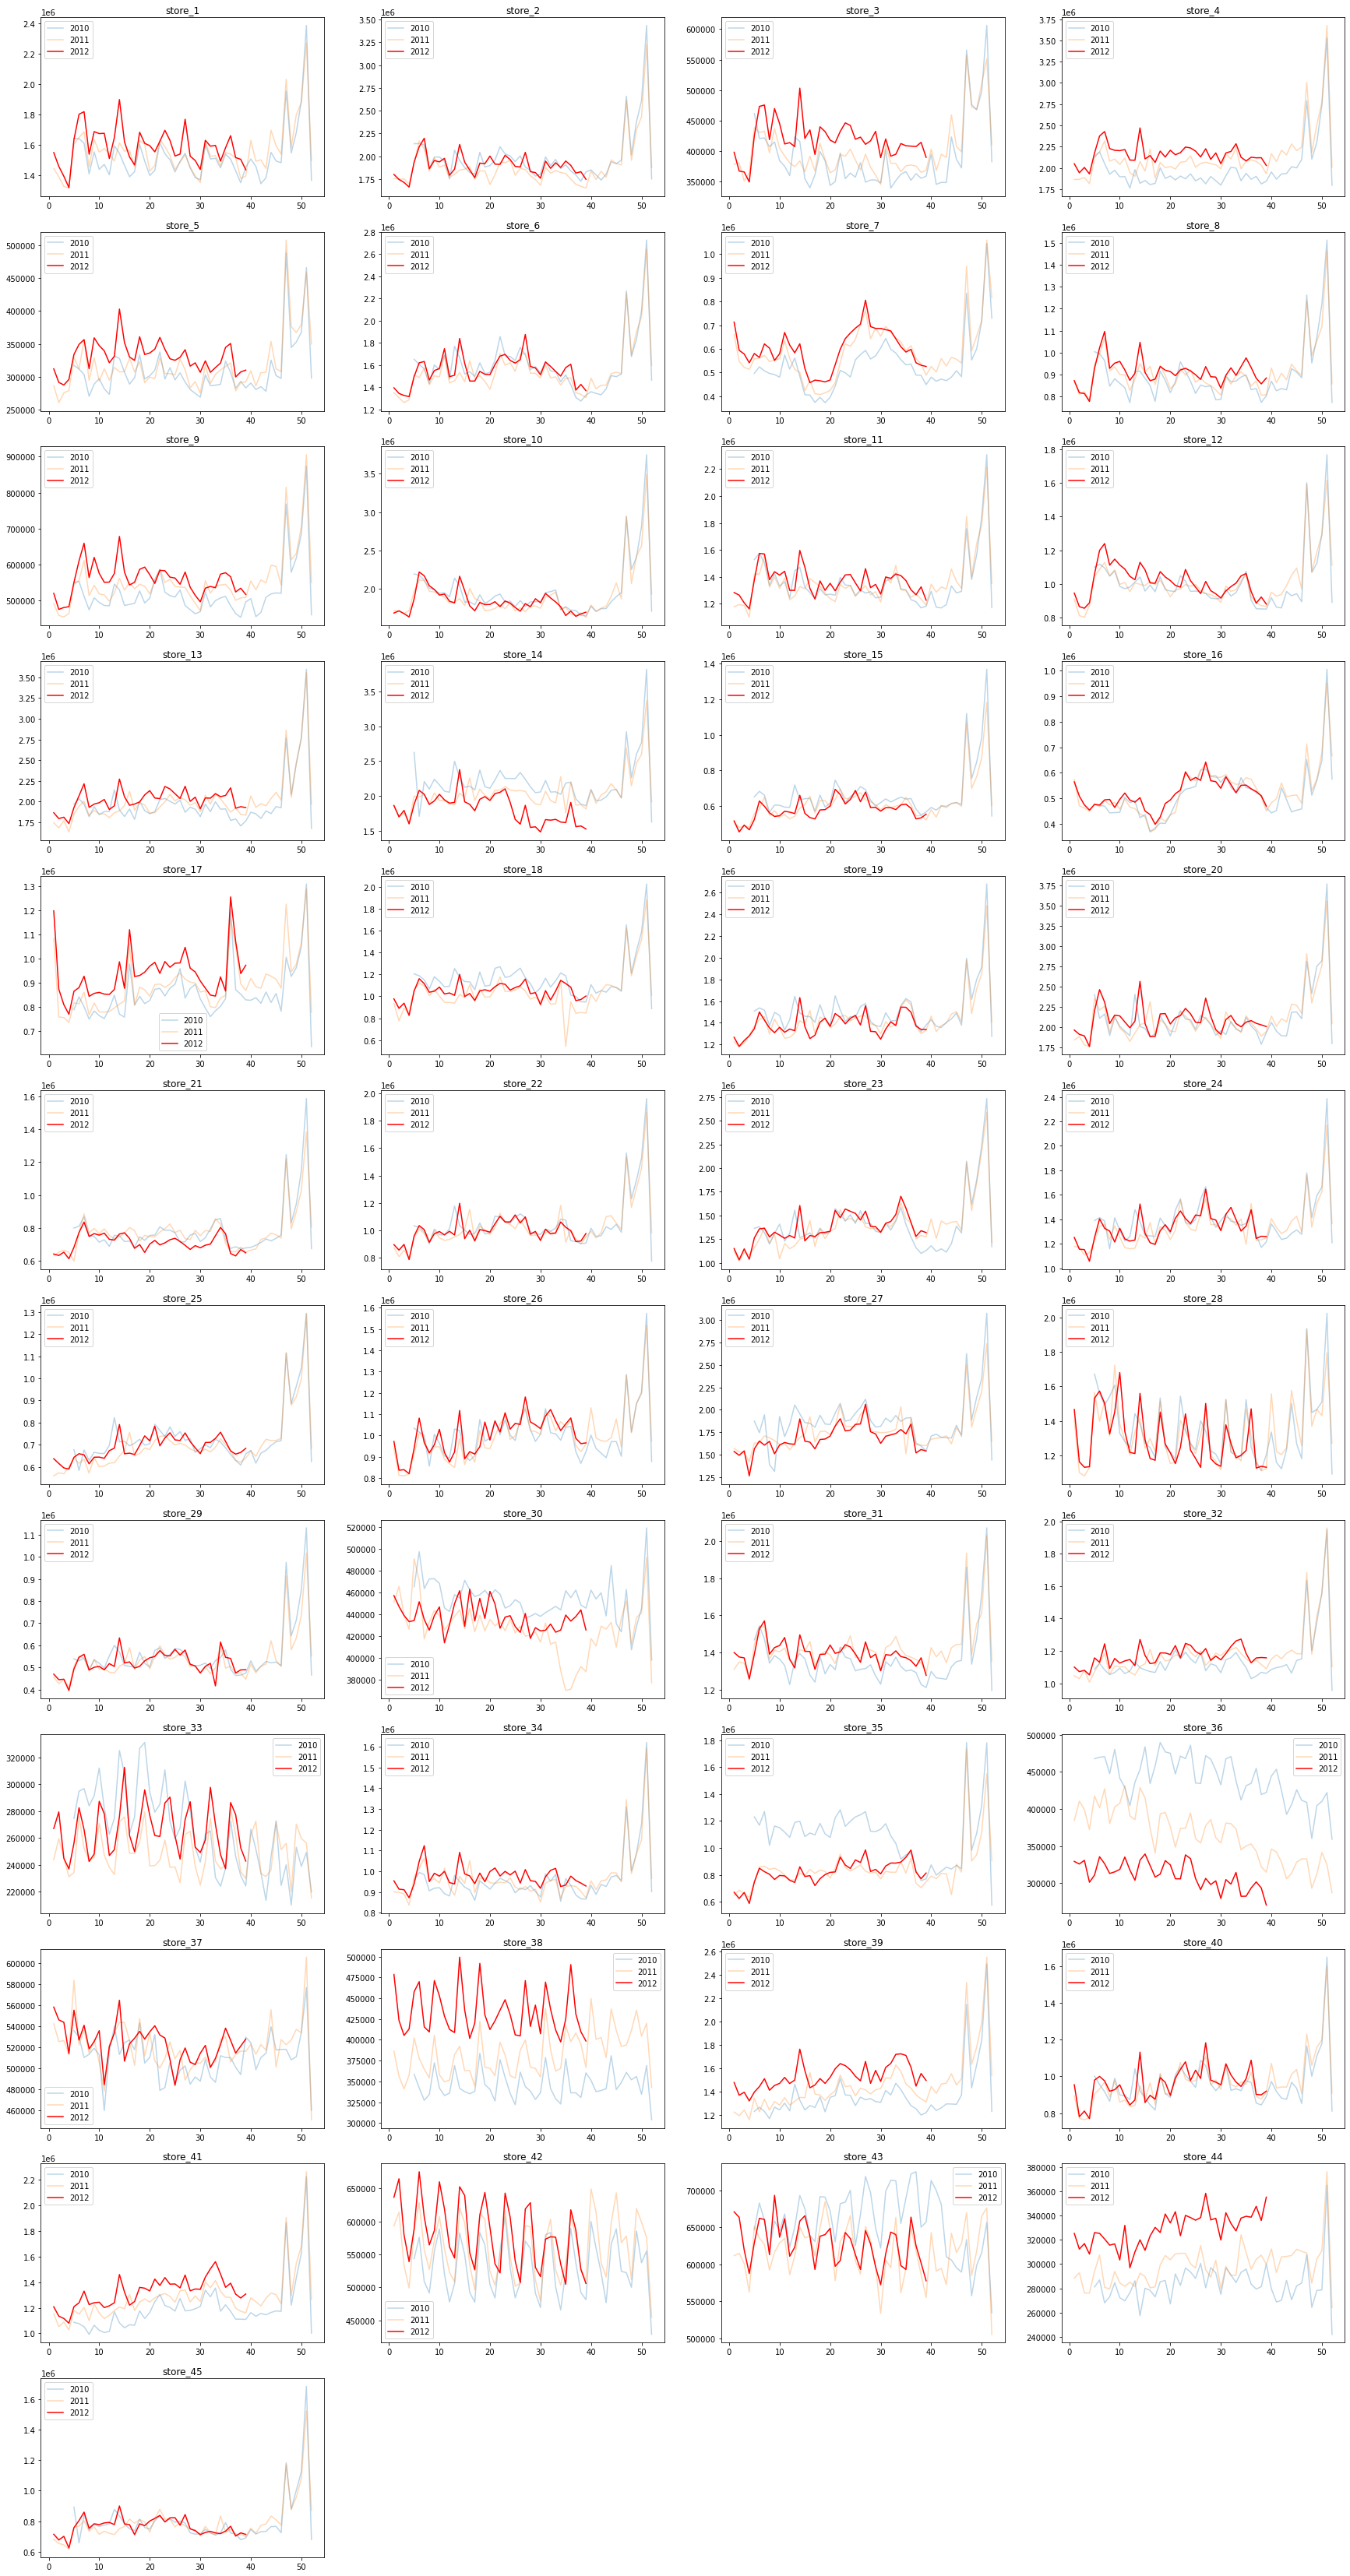

In [28]:
# 지점별 매출액 차이
# Differences in sales by Store

fig = plt.figure(figsize=(30,60))

for store in range(1,max(data.Store)+1):
    store_set = data[data.Store==store]
    store_set_2010 = store_set[store_set.year==2010]
    store_set_2011 = store_set[store_set.year==2011]
    store_set_2012 = store_set[store_set.year==2012]
    
    ax = fig.add_subplot(12, 4, store)
    
    plt.title(f"store_{store}")
    ax.plot(store_set_2010.week, store_set_2010.Weekly_Sales, label="2010", alpha=0.3)
    ax.plot(store_set_2011.week, store_set_2011.Weekly_Sales, label="2011", alpha=0.3)
    ax.plot(store_set_2012.week, store_set_2012.Weekly_Sales, label="2012", color='r')
    ax.legend()
    
plt.show()

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

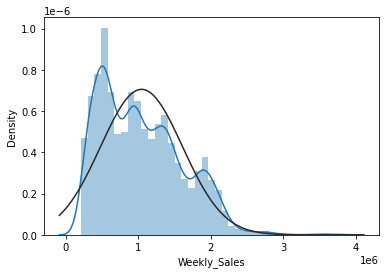

In [29]:
from scipy import stats


# Checking the Histogram of Target Variables
sns.distplot(data['Weekly_Sales'], fit=stats.norm)



<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

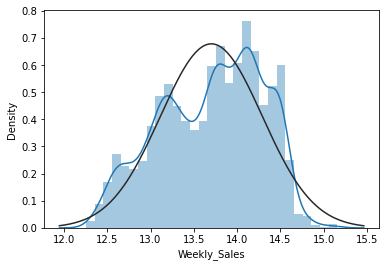

In [30]:
# Original Target variables is imbalance, So I used Log transform
sns.distplot(np.log1p(data['Weekly_Sales']), fit=stats.norm)
# It seems balance now